In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from sklearn.linear_model import LinearRegression
from plottable.plots import image
from PIL import Image
import time
import numpy as np

In [8]:
df = pd.read_excel("C:/Users/George/Documents/Football Analytics/Data/ChampTableHistory.xlsx")

In [9]:
df.rename(columns={'Rk': 'Pos'}, inplace=True)

In [10]:
df

,Pos,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,xG,xGA,xGD,xGD/90
0,1,Manchester City,46,31,6,9,108,52,56,99,2.15,33059.0,Shaun Goater - 28,Nicky Weaver,Promoted,NaN,NaN,NaN,NaN
1,2,West Brom,46,27,8,11,61,29,32,89,1.93,20910.0,Scott Dobie - 11,Russell Hoult,Promoted,NaN,NaN,NaN,NaN
2,3,Wolves,46,25,11,10,76,43,33,86,1.87,23794.0,Dean Sturridge - 20,Michael Oakes,→ Semi-finals,NaN,NaN,NaN,NaN
3,4,Millwall,46,22,11,13,69,48,21,77,1.67,13250.0,Steve Claridge - 17,Tony Warner,→ Semi-finals,NaN,NaN,NaN,NaN
4,5,Birmingham City,46,21,13,12,70,49,21,76,1.65,21978.0,Tommy Mooney - 13,Nico Vaesen,"Promoted, → Semi-finals",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,20,QPR,46,13,11,22,44,71,-27,50,1.09,14977.0,Lyndon Dykes - 8,Seny Dieng,NaN,50.3,62.4,-12.0,-0.26
524,21,Cardiff City,46,13,10,23,41,58,-17,49,1.07,19020.0,Sory Kaba - 8,Ryan Allsop,NaN,47.4,56.3,-9.0,-0.20
525,22,Reading,46,13,11,22,46,68,-22,50,1.09,14027.0,"Andy Carroll, Tom Ince - 9",Joe Lumley,Relegated,41.8,59.9,-18.1,-0.39
526,23,Blackpool,46,11,11,24,48,72,-24,44,0.96,12674.0,Jerry Yates - 14,Chris Maxwell,Relegated,47.8,71.7,-23.9,-0.52


In [11]:
y = df.Pos
x = df.Pts.values.reshape(-1, 1)

In [12]:
print(x.shape,y.shape)

(528, 1) (528,)


In [13]:
model = LinearRegression().fit(x, y)
#mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

In [14]:
r_sq = model.score(x, y) # R^2 value  
intercept = model.intercept_ # intercept
slope = model.coef_ 

In [15]:
print(r_sq)

0.9204455841124972


In [16]:
y_pred = intercept + slope * x

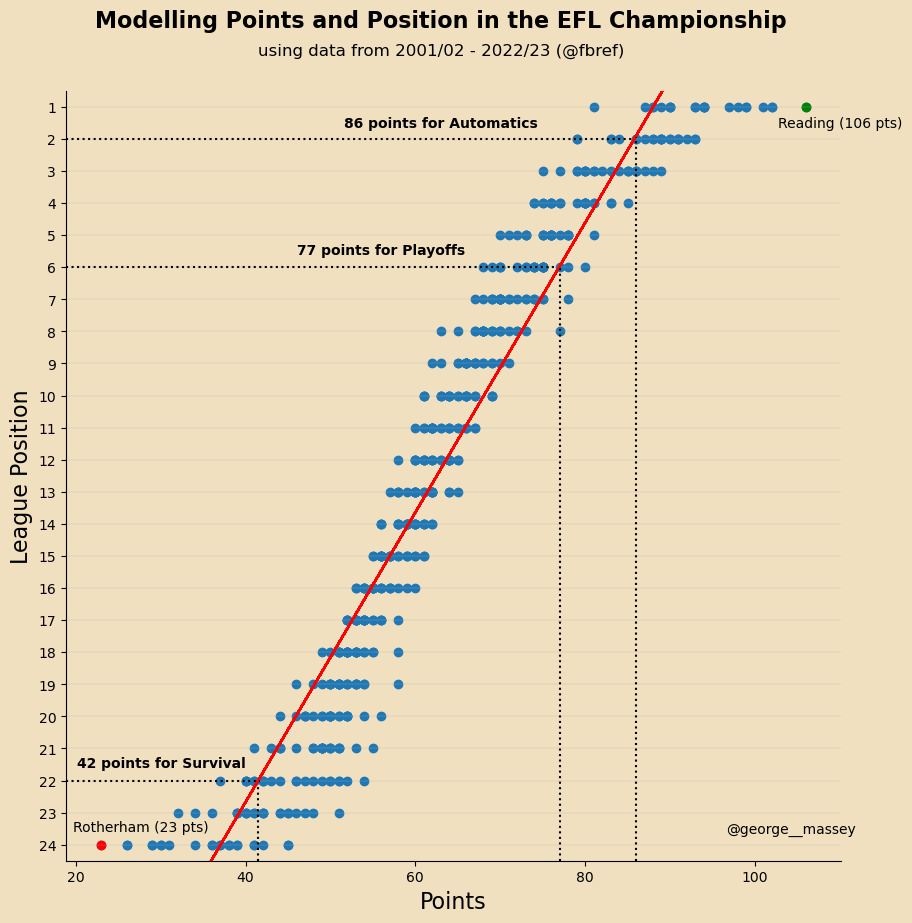

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

fig.set_facecolor('#F0E0C0')

plt.scatter(x, y)
plt.yticks([i for i in range(1, 25)])
plt.gca().invert_yaxis()
plt.plot(x, y_pred, color='red')    
plt.ylim(24.5, 0.5)
plt.xlabel('Points', fontsize=16)
plt.ylabel('League Position', fontsize=16)
#plt.title('Linearly Modelling Points and League Position', fontsize=20)

# Label the data points
worst_points = 23 #df['Pts'].idxmin()
best_points = 106 #df['Pts'].idxmax()

worst_team_name = 'Rotherham' #df.loc[worst_points, 'Squad']
worst_season = '23 pts' #df.loc[worst_points, 'Year']
combined_worst = f"{worst_team_name} ({worst_season})"

best_team_name = 'Reading' #df.loc[best_points, 'Squad']
best_season = '106 pts' #df.loc[best_points, 'Year']
combined_best = f"{best_team_name} ({best_season})"

# Color the minimum and maximum points
ax.scatter(23, 24, color='red')
ax.scatter(106, 1, color='green')

# Annotate the minimum and maximum points
ax.annotate(combined_worst, (23, 24), xytext=(-20, 10), textcoords='offset points')
ax.annotate(combined_best, (106, 1), xytext=(-20, -15), textcoords='offset points')

# Add dotted lines from data points to x-axis
ax.axvline(x = 41.5, color='black', linestyle='dotted', ymax = 0.1)
ax.axvline(x = 77, color='black', linestyle='dotted', ymax = 0.77)
ax.axvline(x = 86, color='black', linestyle='dotted', ymax = 0.94)
ax.axhline(y = 22, color='black', linestyle='dotted', xmax = 0.25)
ax.axhline(y = 6, color='black', linestyle='dotted', xmax = 0.63)
ax.axhline(y = 2, color='black', linestyle='dotted', xmax = 0.73)
# Remove right and top borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Annotate the expected points needed to finish 22nd
fig.text(0.22, 0.207, '42 points for Survival', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.44, 0.72, '77 points for Playoffs', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.5, 0.847, '86 points for Automatics', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.5,0.95, 'Modelling Points and Position in the EFL Championship', ha='center', va='center', fontsize=16, color='black', weight='bold')
fig.text(0.5,0.92, 'using data from 2001/02 - 2022/23 (@fbref)', ha='center', va='center', fontsize=12, color='black')
fig.text(0.85,0.14, '@george__massey', ha='center', va='center', fontsize=10, color='black')
ax.set_facecolor('#F0E0C0')

plt.grid(axis='y', linewidth=0.2)
plt.show()

In [18]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Model_Points.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)